In [ ]:
import pandas as pd
data=pd.read_csv("drive/My Drive/DataSets/LungCancer.csv")

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data.isnull().any()

GENDER                   False
AGE                      False
SMOKING                  False
YELLOW_FINGERS           False
ANXIETY                  False
PEER_PRESSURE            False
CHRONIC DISEASE          False
FATIGUE                  False
ALLERGY                  False
WHEEZING                 False
ALCOHOL CONSUMING        False
COUGHING                 False
SHORTNESS OF BREATH      False
SWALLOWING DIFFICULTY    False
CHEST PAIN               False
LUNG_CANCER              False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

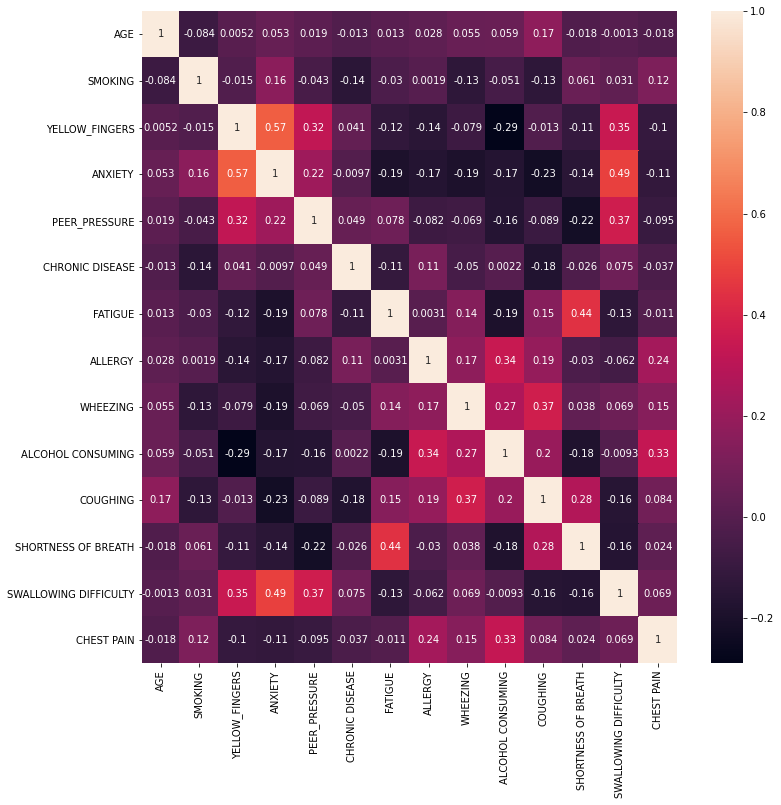

In [ ]:
cor=data.corr()
plt.figure(figsize=(12,12))
ax=sns.heatmap(cor,annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


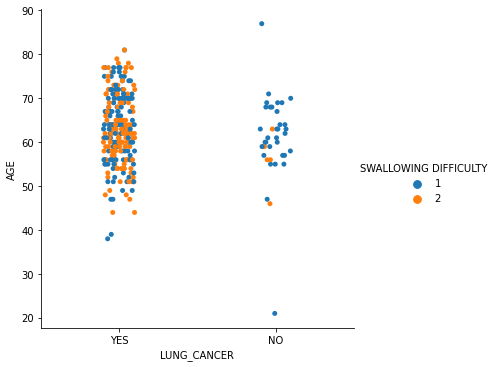

In [ ]:
sns.catplot('LUNG_CANCER','AGE',data=data,hue="SWALLOWING DIFFICULTY")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


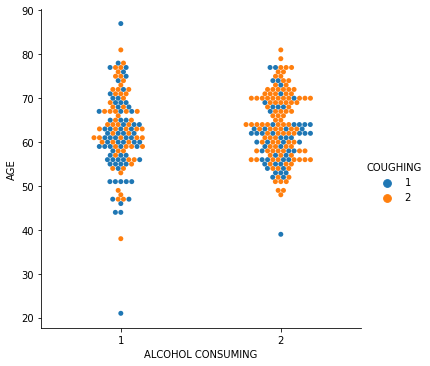

In [ ]:
sns.catplot('ALCOHOL CONSUMING','AGE',data=data,hue="COUGHING",kind='swarm')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


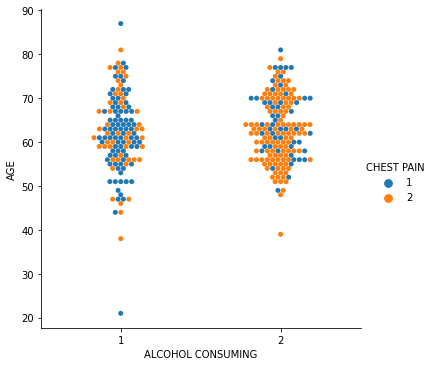

In [ ]:
sns.catplot('ALCOHOL CONSUMING','AGE',data=data,hue='CHEST PAIN',kind='swarm')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


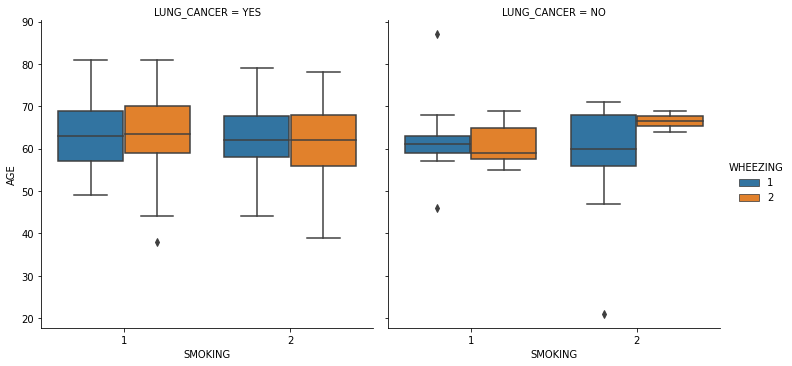

In [ ]:
sns.catplot('SMOKING','AGE',data=data,hue='WHEEZING',kind="box",col="LUNG_CANCER")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


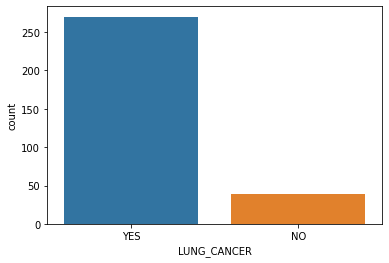

In [ ]:
sns.countplot('LUNG_CANCER',data=data)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.GENDER = le.fit_transform(data.GENDER)

In [ ]:
data.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


In [ ]:
le_opt=LabelEncoder()
data.LUNG_CANCER = le.fit_transform(data.LUNG_CANCER)

In [ ]:
data.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0


In [ ]:
x=data.drop(['LUNG_CANCER'],axis=1)
y=data.LUNG_CANCER

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import numpy as np
np.bincount(y_train)

array([218, 218])

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
models = []
f1Scores = []

In [ ]:
from sklearn.metrics import f1_score
print('F1Score of Logistic Regression: ', f1_score(y_test, y_pred, average="macro"))

F1Score of Logistic Regression:  0.8050314465408804


In [ ]:
models.append("Logitic Regression")
f1Scores.append(f1_score(y_test, y_pred, average="macro"))

In [ ]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf')
classifier_rbf.fit(x_train, y_train)
y_pred = classifier_rbf.predict(x_test)
print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))
print('F1Score of SVC (RBF) classifier ',f1_score(y_test, y_pred, average="macro"))

Accuracy of SVC (RBF) classifier on test set: 0.45
F1Score of SVC (RBF) classifier  0.43696581196581197


In [ ]:
models.append("Support Vector Machine Classifier")
f1Scores.append(f1_score(y_test, y_pred, average="macro"))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))
print('F1Score of Random Forest classifier ',f1_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.97
F1Score of Random Forest classifier  0.9403846153846154


In [ ]:
models.append("Random Forest")
f1Scores.append(f1_score(y_test, y_pred, average="macro"))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradBoost=GradientBoostingClassifier(loss="exponential",learning_rate=0.01, n_estimators=50, max_depth=10,random_state=42)
gradBoost.fit(x_train,y_train)
ypredGradBoost=gradBoost.predict(x_test)
print('Accuracy of Gradient Boosting Classifier on test set: {:.2f}'.format(gradBoost.score(x_test, y_test)))
print('F1Score of Gradient Boosting classifier ',f1_score(y_test, y_pred, average="macro"))

Accuracy of Gradient Boosting Classifier on test set: 0.95
F1Score of Gradient Boosting classifier  0.9403846153846154


In [ ]:
models.append("Gradient Boosting Classifier")
f1Scores.append(f1_score(y_test, y_pred, average="macro"))

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
xgBoost= XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
scores_xgBoost=cross_val_score(xgBoost,x_train,y_train,cv=10,scoring="f1_micro")
print(scores_xgBoost)
print(scores_xgBoost.mean())

[0.77272727 0.93181818 1.         0.95454545 0.97727273 0.93181818
 1.         0.95348837 0.97674419 0.95348837]
0.9451902748414376


In [ ]:
models.append("XGB Classifier")
f1Scores.append(scores_xgBoost.mean())

In [ ]:
featureImportance=list(model.feature_importances_)
allfeatures=data.drop('LUNG_CANCER',axis=1)
features=list(allfeatures.columns)

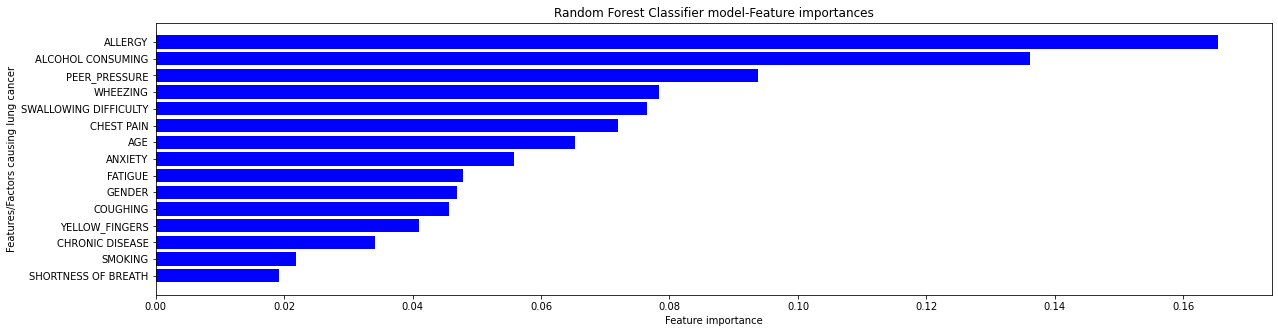

In [ ]:
import matplotlib.pyplot as plt
zipped_lists=zip(featureImportance,features)
zipped_lists=list(sorted(zipped_lists))
importanceSorted,featuresSorted = zip(*zipped_lists)
fig = plt.figure(figsize = (20, 5)) 
plt.barh(list(featuresSorted), list(importanceSorted), color ='blue') 
plt.title('Random Forest Classifier model-Feature importances')
plt.ylabel("Features/Factors causing lung cancer") 
plt.xlabel("Feature importance") 
plt.show() 

In [ ]:
balanced_x = pd.DataFrame(x_train,columns=features)

In [ ]:
balanced_y=pd.DataFrame(y_train,columns=['LUNG_CANCER'])

In [ ]:
cancerData=pd.concat([balanced_x,balanced_y],axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


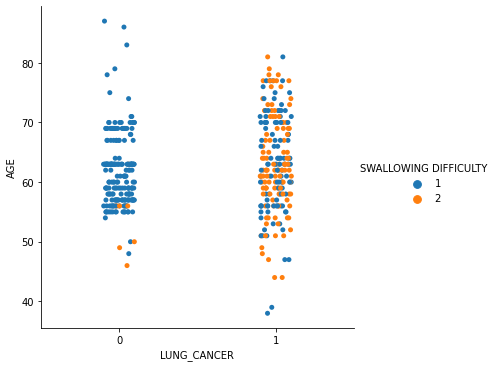

In [ ]:
sns.catplot('LUNG_CANCER','AGE',data=cancerData,hue="SWALLOWING DIFFICULTY")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


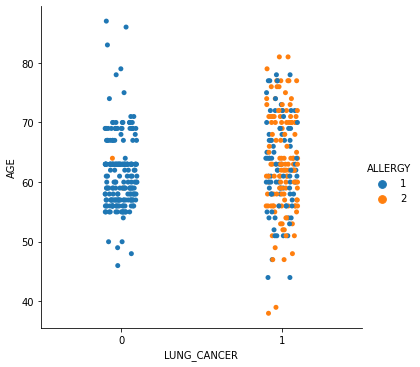

In [ ]:
sns.catplot('LUNG_CANCER','AGE',data=cancerData,hue="ALLERGY")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


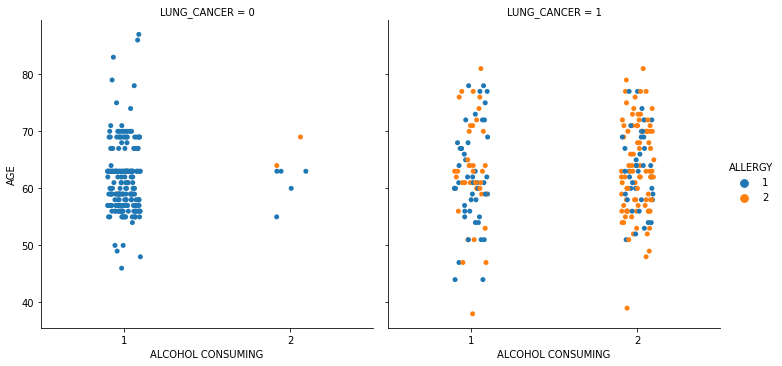

In [ ]:
sns.catplot('ALCOHOL CONSUMING','AGE',data=cancerData,hue="ALLERGY",col="LUNG_CANCER")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


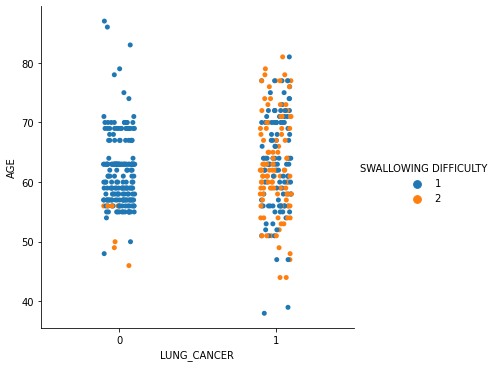

In [ ]:
sns.catplot('LUNG_CANCER','AGE',data=cancerData,hue="SWALLOWING DIFFICULTY")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


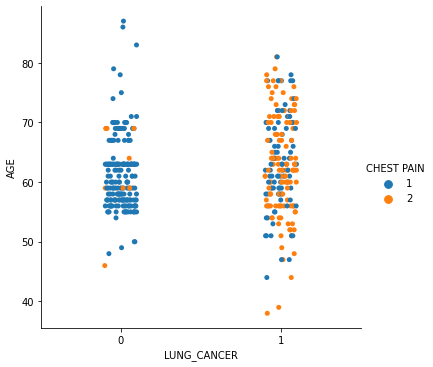

In [ ]:
sns.catplot('LUNG_CANCER','AGE',data=cancerData,hue="CHEST PAIN")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


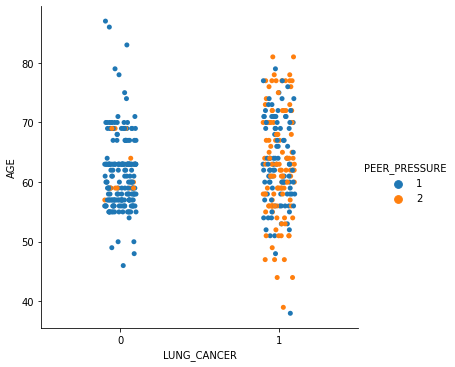

In [ ]:
sns.catplot('LUNG_CANCER','AGE',data=cancerData,hue="PEER_PRESSURE")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


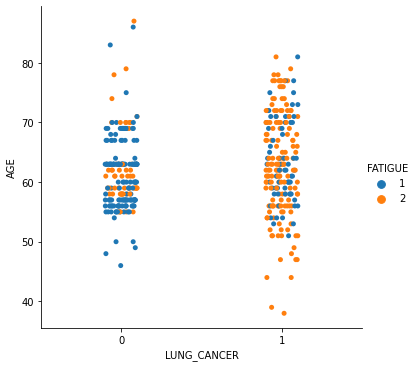

In [ ]:
sns.catplot('LUNG_CANCER','AGE',data=cancerData,hue="FATIGUE")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


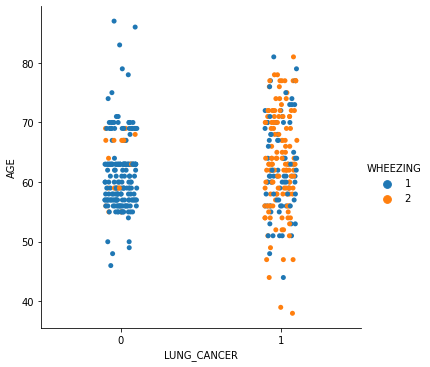

In [ ]:
sns.catplot('LUNG_CANCER','AGE',data=cancerData,hue="WHEEZING")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


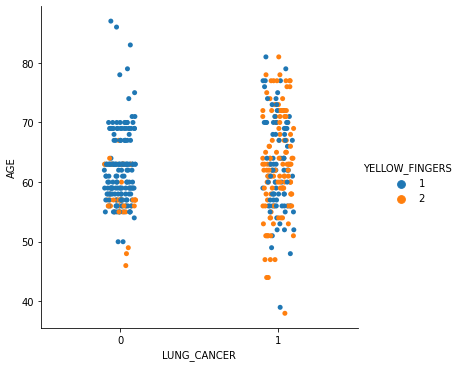

In [ ]:
sns.catplot('LUNG_CANCER','AGE',data=cancerData,hue="YELLOW_FINGERS")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


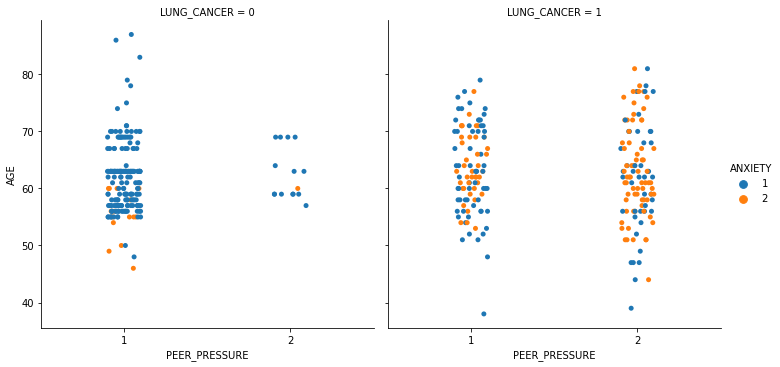

In [ ]:
sns.catplot('PEER_PRESSURE','AGE',data=cancerData,hue="ANXIETY",col="LUNG_CANCER")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


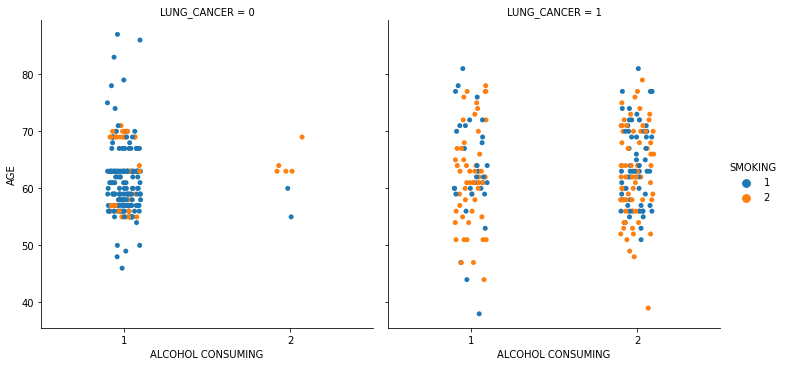

In [ ]:
sns.catplot('ALCOHOL CONSUMING','AGE',data=cancerData,hue="SMOKING",col="LUNG_CANCER")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


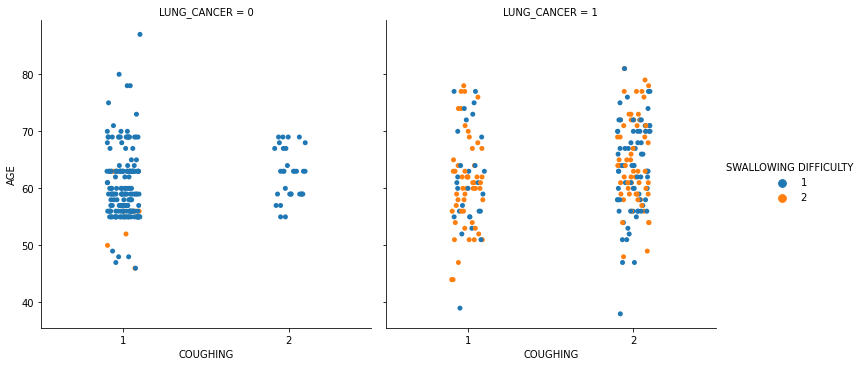

In [ ]:
sns.catplot('COUGHING','AGE',data=cancerData,hue="SWALLOWING DIFFICULTY",col="LUNG_CANCER")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


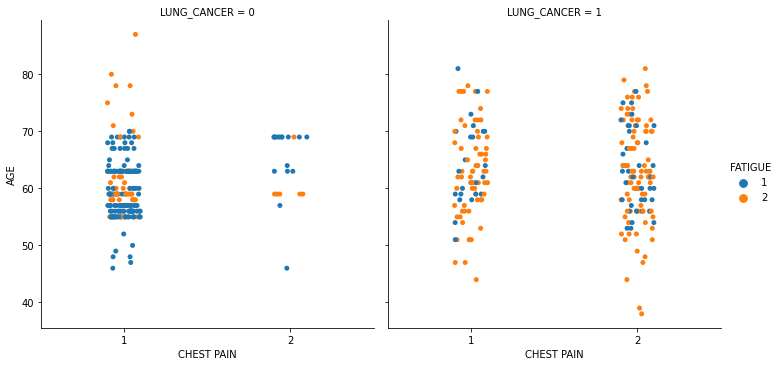

In [ ]:
sns.catplot('CHEST PAIN','AGE',data=cancerData,hue="FATIGUE",col="LUNG_CANCER")

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('lungcancer.pkl','wb'))

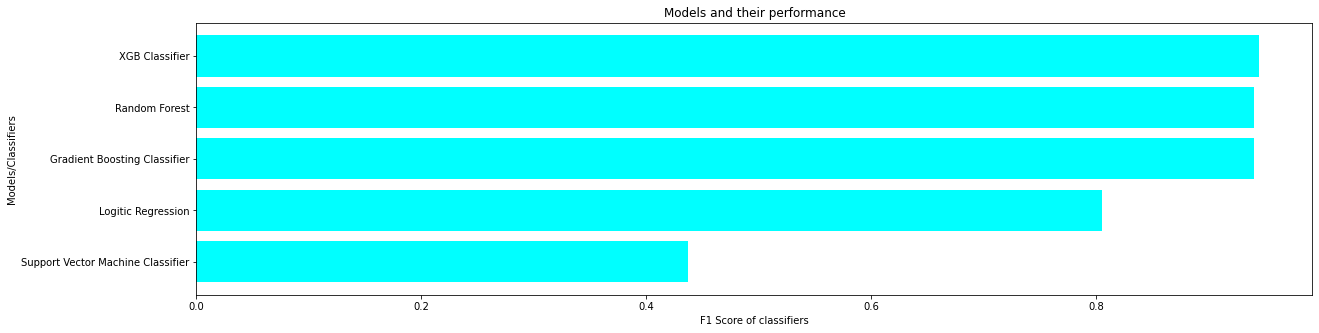

In [ ]:
zipped_lists=zip(f1Scores, models)
zipped_lists=list(sorted(zipped_lists))
f1ScoresSorted,modelsSorted = zip(*zipped_lists)
fig = plt.figure(figsize = (20, 5)) 
plt.barh(list(modelsSorted), list(f1ScoresSorted), color ='cyan') 
plt.title('Models and their performance')
plt.xlabel("F1 Score of classifiers") 
plt.ylabel("Models/Classifiers") 
plt.show()